<a href="https://colab.research.google.com/github/ShamsElshazly75/SHAI_for_AI/blob/main/task_8_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# shAI Training 2023 | Level 1


## Task#10 (MNIST Project)

### Classification

- Before you start make sure you have latest Jupyter notebook version
- <font color= red> If you have older version fetching the data might be different  </font>  


## Get tha dataset

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', as_frame=False)

### exploring and preparing the dataset

#### print your dataset to get insight

In [3]:
mnist

{'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'frame': None,
 'categories': {'class': ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']},
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47

#### Split you data into data and labels (target)

In [4]:
data = mnist['data']
target = mnist['target']

#### find the data shape using .shape function

In [5]:
data.shape


(70000, 784)

### Peek at one digit from the dataset

In [6]:
import matplotlib
import matplotlib.pyplot as plt

***NOTE: ALL THE COMMANDS FOR PLOTTING A FIGURE SHOULD ALL GO IN THE SAME CELL. SEPARATING THEM OUT INTO MULTIPLE CELLS MAY CAUSE NOTHING TO SHOW UP.***

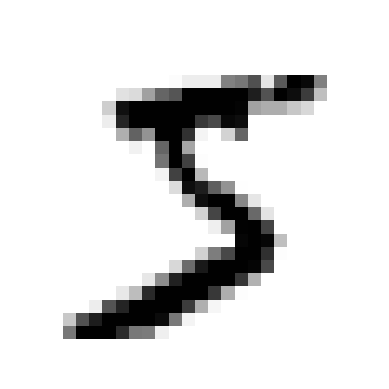

In [7]:
def image_show(image):
  image = image.reshape(28 , 28)
  plt.imshow(image , cmap='binary')
  plt.axis('off')

some_digit=data[0]
image_show(some_digit)
plt.show()


#### Split the data into train and test set

In [8]:
import numpy as np

In [9]:
x_train = data[:5000]
y_train = target[:5000]
x_test = data[5000:]
y_test = target[5000:]

### Shuffling the training set

In [10]:
from sklearn.utils import shuffle
X_shuffled, y_shuffled = shuffle(x_train, y_train, random_state=42)
print("Shuffled X:\n", X_shuffled)
print("Shuffled y:\n", y_shuffled)


Shuffled X:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Shuffled y:
 ['0' '0' '7' ... '4' '6' '0']


#### access the label of the above digit image

In [11]:
y_train[0]

'5'

### Training a <font color= red>Binary</font> classifier


#### Create the target vectors for this classification task
***NOTE : you can try different number.***

In [12]:
y_train_5 = (y_shuffled == '5')
y_test_5 = (y_test == '5')


### SGD classifier

#### Create a SGD classifier

In [13]:
from sklearn.linear_model import SGDClassifier

In [14]:
SGD = SGDClassifier(random_state=42)

#### use SGD classifier  to detect images of the number 5

In [15]:
SGD.fit(X_shuffled , y_train_5)


SGDClassifier(random_state=42)

## Performance measure

####  Measuring Accuracy Using <font color= blue>Cross-validation</font>

In [16]:
from sklearn.model_selection import cross_val_score

In [17]:
cross_sgd = cross_val_score(SGD , X_shuffled , y_train_5 , cv = 5  , scoring='accuracy')

In [18]:
cross_sgd

array([0.943, 0.966, 0.946, 0.954, 0.951])

#### Try a dumb classifier

In [19]:
from sklearn.dummy import DummyClassifier

In [20]:
dummy = DummyClassifier(random_state=42)

In [21]:
dummy.fit(X_shuffled , y_train_5)

DummyClassifier(random_state=42)

#### find cross_val_score for the dumb classifier

In [22]:
cross_dummy = cross_val_score(dummy , X_shuffled , y_train_5 , cv = 5  , scoring='accuracy')

In [23]:
cross_dummy

array([0.914, 0.913, 0.913, 0.913, 0.913])

## Confusion matrix

In [24]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

#### try to find confusion matrix

#### SGD algorthim

In [25]:
cross_sgd_predict = cross_val_predict(SGD , X_shuffled , y_train_5  , cv = 5 )   # predict : the output will be ( 0 or 1 ) based

In [26]:
confusion_matrix_sgd = confusion_matrix(y_train_5 , cross_sgd_predict)

In [27]:
confusion_matrix_sgd  # 80 FP, 160 FN  , if this is medical case so it is not accepted to have this number of false negtive (Recalls )

array([[4406,  160],
       [  80,  354]])

### Dummy classifier Algorthim

In [28]:
cross_dummy_predict = cross_val_predict(dummy , X_shuffled , y_train_5 , cv=5 )  # predict : the output will be ( 0 or 1 )

In [29]:
confusion_matrix_dummy = confusion_matrix(y_train_5 , cross_dummy_predict)

In [30]:
confusion_matrix_dummy

array([[4566,    0],
       [ 434,    0]])

####  try perfect classifier which will have only true positives and true negative


perfect classifier would only have true positives and true negatives, so its
confusion matrix would have nonzero values only on its main diagonal (top
left to bottom right):

In [31]:
perfect_classifier_prediction = y_train_5

In [32]:
confusion_matrix(y_train_5 , perfect_classifier_prediction)

array([[4566,    0],
       [   0,  434]])

## Precision and Recall

In [33]:
from sklearn.metrics import precision_score, recall_score,f1_score

***Note that precision and recall score might be different from one to anothor***

#### find precision score

In [34]:
precision_score(y_train_5 , cross_sgd_predict )

0.688715953307393

#### find recall score

In [35]:
recall_score(y_train_5 , cross_sgd_predict)

0.815668202764977

#### find f1 score
***Notice that f1 score is harmonic mean between recall and precision***

In [36]:
f1_score(y_train_5 , cross_sgd_predict)

0.7468354430379747

# Precision/Recall Tradeof

#### try to use decision_function() and make prediction

if predict : will compute linear equation then will give large number then apply sgmoind function on to detemine the proba and apply the threshold on it (like logistic regression )

if decision_function : the score will be output from compute the linear equation and if negtive will be class 0 if postive will be class 1

if predict_proba the score will be output from linear equation and segmoind function will compute the proba based on score without belong to any class

In [37]:
pred = SGD.decision_function([some_digit])   # decsion function = f(x) = wX + B give the score
pred

array([77980.00724085])

it belong by less than or greater than 0

#### Set the threshold to zero

In [38]:
threshold_zero = 0
pred_with_zero_threshold = (pred > threshold_zero)  #

pred_with_zero_threshold

array([ True])

#### Set the threshold to 200000

In [39]:
threshold = 200000
pred_with_200000_threshold = (pred > threshold)

pred_with_200000_threshold


array([False])

In [40]:
threshold_negtive = -2000
pred_with_negtive_threshold = (pred > threshold_negtive)

pred_with_negtive_threshold

array([ True])

### Set negtive threshold

#### To decide which threshold you want to use find decision scores for all instances

decision function = large number
predict_proba = probilaty

In [41]:
y_scores_sgd = cross_val_predict(SGD , X_shuffled , y_train_5 , cv = 5 , method='decision_function')


In [42]:
 y_scores_sgd   # scores is the output of F(x) = wx + b

array([ -155981.41632937,  -678393.99147113,  -513487.06729407, ...,
       -1031675.26697446,  -483817.81311106,  -178431.37585538])

#### computing precision and recall for all possible thresholds using the precision_recall_curve()

In [43]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores_sgd)

#### plot precision and recall as functions of the threshold value using Matplotlib

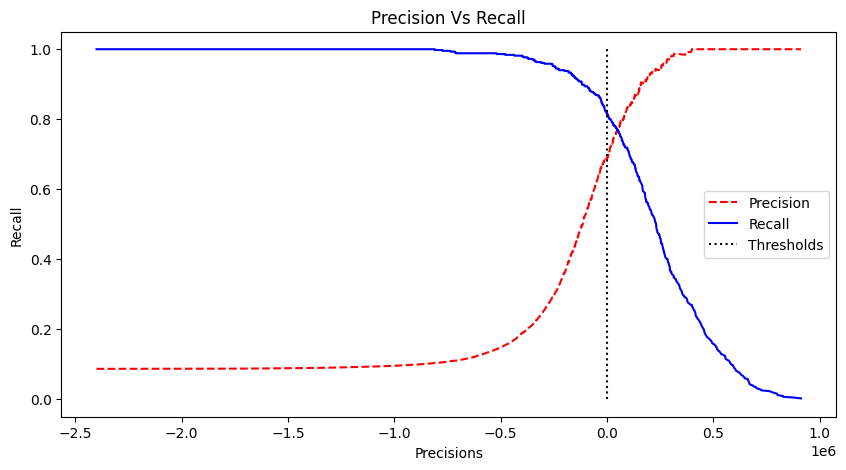

In [44]:
# CODE HERE
plt.figure(figsize=(10,5))
plt.plot( thresholds, precisions[:-1] , 'r--' , label='Precision' )
plt.plot( thresholds, recalls[:-1] , 'b'  , label='Recall')
plt.vlines(threshold_zero , 0 , 1.0 , 'k' , linestyles='dotted' , label='Thresholds' )
plt.xlabel('Precisions')
plt.ylabel('Recall')
plt.title('Precision Vs Recall')
plt.legend()


#### lets aim for 90%recall
#### try different threshold and see what will happen

In [45]:
recalls

array([1.        , 1.        , 1.        , ..., 0.00460829, 0.00230415,
       0.        ])

In [46]:
precisions

array([0.0868    , 0.08681736, 0.08683473, ..., 1.        , 1.        ,
       1.        ])

In [47]:
thresholds.shape

(5000,)

In [48]:
recall_above_90 = (recalls >= 0.90).argmax()


In [49]:
recall_above_90

0

In [50]:
threshold_90_recall = thresholds[recall_above_90]

In [51]:
threshold_90_recall

-2399661.3235504506

In [52]:
precision_above_90 = (precisions >= 0.90).argmax()
precision_above_90.dtype


dtype('int64')

In [53]:
threshold_90_precision = thresholds[precision_above_90]

In [54]:
threshold_90_precision

160367.67572581174

#### Recall score

# The ROC Curve

In [56]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores_sgd)

#### plot the FPR against the TPR using Matplotlib

Text(0, 0.5, 'TPR')

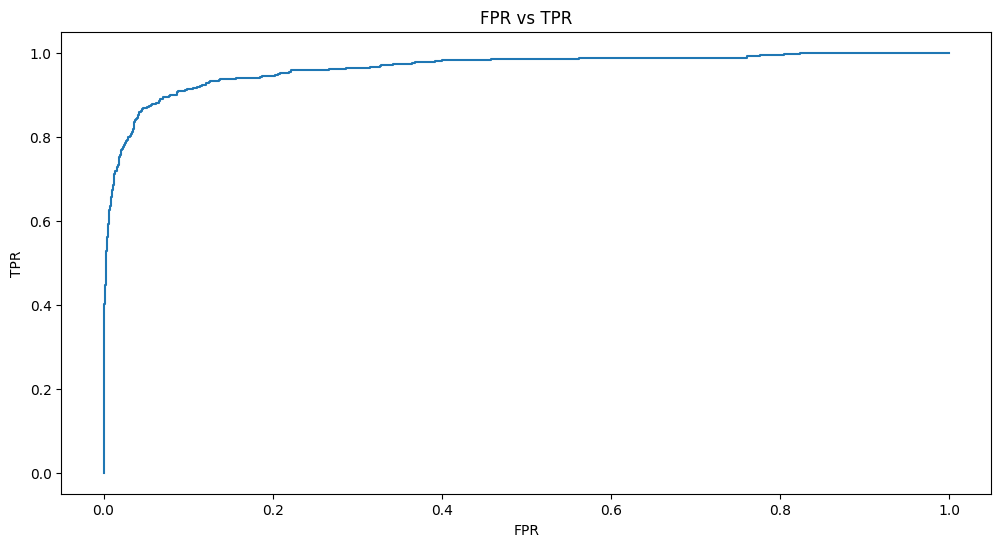

In [57]:
plt.figure(figsize=(12 , 6))
plt.plot(fpr , tpr )
plt.title('FPR vs TPR')
plt.xlabel('FPR')
plt.ylabel('TPR')

FPR measures the proportion of negative instances that were incorrectly classified as positive. It focuses on the negative class.كام واحد معندهوش قلت انه عنده

#### computing the ROC AUC score

In [59]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores_sgd)  #reverse opreation carve _ aree under curve

0.9629620658402821

 AUC (Area Under the Curve):
The AUC is the area under the ROC curve. It provides a single scalar value to summarize the model's performance:

AUC = 1.0: Perfect classifier.
AUC = 0.5: A random or no-skill classifier.
AUC < 0.5: Worse than random (the model might be reversed).

# RandomForest Classifier
#### train a RandomForestClassifier and compare its ROC curve and ROC AUC score to the SGDClassifier

In [60]:
from sklearn.ensemble import RandomForestClassifier

In [61]:
random_forest = RandomForestClassifier(random_state=42)

In [62]:
random_forest.fit(X_shuffled , y_train_5)

RandomForestClassifier(random_state=42)

In [79]:
y_train_5 # the predict return the output like target

array([False, False, False, ..., False, False, False])

In [74]:
cross_forest_predict = cross_val_predict(random_forest, X_shuffled , y_train_5 , cv = 5 , method='predict_proba' )

In [75]:
cross_forest_predict

array([[0.91, 0.09],
       [0.98, 0.02],
       [0.98, 0.02],
       ...,
       [0.98, 0.02],
       [0.86, 0.14],
       [0.97, 0.03]])

#### try to plot ROC
***Notice that you will need scores not probabilities***

In [76]:
positive_class_proba = cross_forest_predict[:, 1]

In [77]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, positive_class_proba)

Scikit-learn will automatically encode string labels ("True" and "False") into numerical values internally (e.g., "False" = 0 and "True" = 1).

Text(0, 0.5, 'TPR')

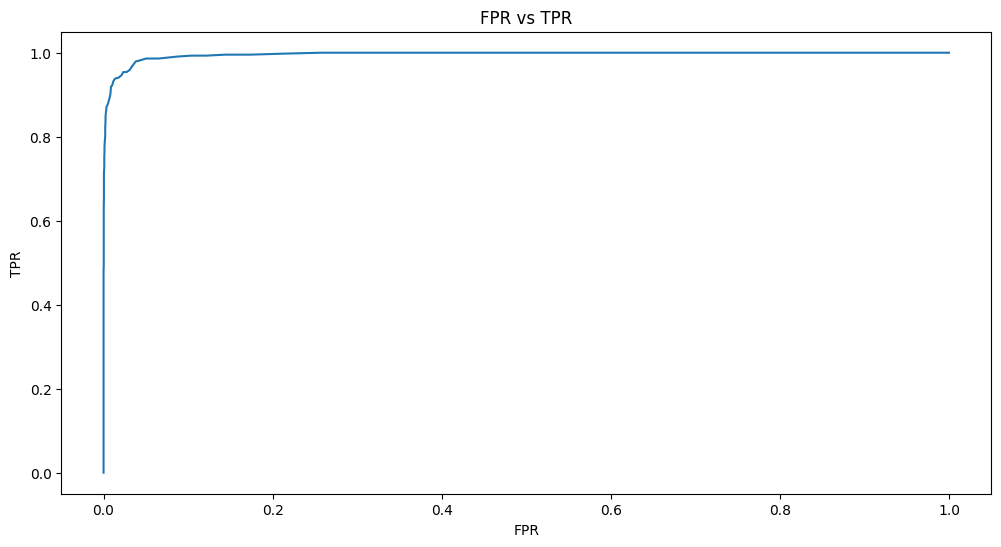

In [78]:
plt.figure(figsize=(12 , 6))
plt.plot(fpr , tpr )
plt.title('FPR vs TPR')
plt.xlabel('FPR')
plt.ylabel('TPR')

#### find ROC AUC score for randomforestclassifier

In [81]:
roc_auc_score(y_train_5 , positive_class_proba)

0.9957979334330485


# Congrats you did it 🥳 !
# #shAI_Club